In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 6
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.3
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[6_30_51_300_0.3_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[6_30_51_300_0.3_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	634.4949

Best Fitness:	627.0585
Solution:	600.0000
Diff:		27.0585

[0:13:31][----------] 1.96% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	629.8183

Best Fitness:	621.6009
Solution:	600.0000
Diff:		21.6009

[0:24:43][----------] 3.92% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	638.5995

Best Fitness:	632.1453
Solution:	600.0000
Diff:		32.1453

[0:35:52][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	638.1884

Best Fitness:	631.0960
Solution:	600.0000
Diff:		31.0960

[0:47:07][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	636.2738

Best Fitness:	630.8156
Solution:	600.0000
Diff:		30.8156

[0:57:57][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	637.5280

Best Fitness:	630.5935
Solution:	600.0000
Diff:		30.5935

[1:08:37][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	623.9304

Best Fitness:	618.2386
Solution:	600.0000
Diff:		18.2386

[1:19:34][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	628.2558

Best Fitness:	623.6148
Solution:	600.0000
Diff:		23.6148

[1:30:41][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	637.5645

Best Fitness:	630.5485
Solution:	600.0000
Diff:		30.5485

[1:41:53][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	631.4576

Best Fitness:	626.0284
Solution:	600.0000
Diff:		26.0284

[1:52:46][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	642.4310

Best Fitness:	636.2689
Solution:	600.0000
Diff:		36.2689

[2:03:30][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	639.4304

Best Fitness:	633.9127
Solution:	600.0000
Diff:		33.9127

[2:14:41][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	637.9773

Best Fitness:	630.3002
Solution:	600.0000
Diff:		30.3002

[2:25:09][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	635.6262

Best Fitness:	630.3084
Solution:	600.0000
Diff:		30.3084

[2:36:22][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	638.9283

Best Fitness:	634.1063
Solution:	600.0000
Diff:		34.1063

[2:46:51][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	631.8153

Best Fitness:	625.6242
Solution:	600.0000
Diff:		25.6242

[2:56:29][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	642.7031

Best Fitness:	634.3410
Solution:	600.0000
Diff:		34.3410

[3:06:23][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	631.9016

Best Fitness:	626.7359
Solution:	600.0000
Diff:		26.7359

[3:15:48][####------] 35.29% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	641.3799

Best Fitness:	636.6407
Solution:	600.0000
Diff:		36.6407

[3:25:43][####------] 37.25% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	640.9577

Best Fitness:	633.8069
Solution:	600.0000
Diff:		33.8069

[3:35:23][####------] 39.22% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	639.6552

Best Fitness:	633.3469
Solution:	600.0000
Diff:		33.3469

[3:45:23][####------] 41.18% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	637.9322

Best Fitness:	631.1477
Solution:	600.0000
Diff:		31.1477

[3:55:01][####------] 43.14% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	638.2392

Best Fitness:	630.3317
Solution:	600.0000
Diff:		30.3317

[4:04:19][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	639.8083

Best Fitness:	632.8867
Solution:	600.0000
Diff:		32.8867

[4:13:59][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	640.2925

Best Fitness:	634.4152
Solution:	600.0000
Diff:		34.4152

[4:23:22][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	638.5478

Best Fitness:	630.0681
Solution:	600.0000
Diff:		30.0681

[4:32:51][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	638.8877

Best Fitness:	630.7036
Solution:	600.0000
Diff:		30.7036

[4:42:51][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	631.0389

Best Fitness:	624.6675
Solution:	600.0000
Diff:		24.6675

[4:52:33][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	638.5642

Best Fitness:	633.6178
Solution:	600.0000
Diff:		33.6178

[5:02:20][######----] 56.86% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	641.1337

Best Fitness:	633.8721
Solution:	600.0000
Diff:		33.8721

[5:11:53][######----] 58.82% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	637.5028

Best Fitness:	630.1819
Solution:	600.0000
Diff:		30.1819

[5:21:40][######----] 60.78% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	637.4627

Best Fitness:	630.0699
Solution:	600.0000
Diff:		30.0699

[5:31:29][######----] 62.75% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	630.2731

Best Fitness:	625.6822
Solution:	600.0000
Diff:		25.6822

[5:40:36][######----] 64.71% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	641.1928

Best Fitness:	634.3454
Solution:	600.0000
Diff:		34.3454

[5:49:26][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	637.3286

Best Fitness:	630.0971
Solution:	600.0000
Diff:		30.0971

[5:58:24][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	641.4672

Best Fitness:	635.8086
Solution:	600.0000
Diff:		35.8086

[6:06:55][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	641.5312

Best Fitness:	633.4596
Solution:	600.0000
Diff:		33.4596

[6:15:35][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	638.4695

Best Fitness:	632.3267
Solution:	600.0000
Diff:		32.3267

[6:24:23][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	631.1674

Best Fitness:	624.6157
Solution:	600.0000
Diff:		24.6157

[6:32:45][########--] 76.47% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	639.9470

Best Fitness:	633.4321
Solution:	600.0000
Diff:		33.4321

[6:41:16][########--] 78.43% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	638.6327

Best Fitness:	631.7717
Solution:	600.0000
Diff:		31.7717

[6:49:43][########--] 80.39% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	632.1107

Best Fitness:	625.6121
Solution:	600.0000
Diff:		25.6121

[6:58:26][########--] 82.35% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	630.9732

Best Fitness:	625.4466
Solution:	600.0000
Diff:		25.4466

[7:07:04][########--] 84.31% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	637.9273

Best Fitness:	630.9246
Solution:	600.0000
Diff:		30.9246

[7:15:43][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	628.4885

Best Fitness:	622.6551
Solution:	600.0000
Diff:		22.6551

[7:24:35][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	630.5479

Best Fitness:	624.8188
Solution:	600.0000
Diff:		24.8188

[7:33:19][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	633.9055

Best Fitness:	626.2597
Solution:	600.0000
Diff:		26.2597

[7:41:46][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	643.1851

Best Fitness:	637.6776
Solution:	600.0000
Diff:		37.6776

[7:50:23][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	637.6647

Best Fitness:	629.9459
Solution:	600.0000
Diff:		29.9459

[7:58:48][##########] 96.08% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	635.6257

Best Fitness:	629.2652
Solution:	600.0000
Diff:		29.2652

[8:06:53][##########] 98.04% 

Optimization ended due to max fitness evals (max = 90000.0, curr = 90000)


#Generations:	298

#FitnessEvals:	90000

Mean Fitness:	639.3877

Best Fitness:	632.3013
Solution:	600.0000
Diff:		32.3013

[8:15:49][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

8:15:49

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
293,40.658204,40.548522,40.011407,39.791943,39.526095,37.85044,38.997485,40.870868,39.389505,37.942481,...,39.149309,38.901827,34.995336,42.659003,39.786743,40.747279,38.748496,38.042989,40.709646,50
294,40.658204,40.548522,40.011407,39.791943,39.526095,37.85044,38.997485,40.870868,39.389505,37.942481,...,39.149309,38.901827,34.995336,42.659003,39.786743,40.747279,38.748496,38.042989,40.709646,50
295,40.658204,40.548522,40.011407,39.791943,39.526095,37.85044,38.997485,40.870868,39.389505,37.942481,...,39.149309,38.901827,34.995336,42.399133,39.786743,40.747279,38.748496,38.042989,40.709646,50
296,40.658204,40.548522,40.011407,39.791943,39.526095,37.85044,38.997485,40.870868,39.389505,37.942481,...,39.149309,38.901827,34.995336,42.399133,39.786743,40.747279,38.748496,38.042989,40.709646,50
297,40.658204,40.548522,40.011407,39.791943,39.526095,37.85044,38.997485,40.870868,39.389505,37.942481,...,39.149309,38.901827,34.995336,41.580192,39.786743,40.747279,38.748496,38.042989,40.709646,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 27.05849140050009

Best error for run 1: 21.60088393381443

Best error for run 2: 32.14529515963886

Best error for run 3: 31.09599943169451

Best error for run 4: 30.815579121729684

Best error for run 5: 30.59347684168381

Best error for run 6: 18.238606246131553

Best error for run 7: 23.614771830978384

Best error for run 8: 30.548531065640532

Best error for run 9: 26.028441312897144

Best error for run 10: 36.268895407409104

Best error for run 11: 33.91266640449851

Best error for run 12: 30.300180934017817

Best error for run 13: 30.308426498019685

Best error for run 14: 34.10633671043195

Best error for run 15: 25.624233396232967

Best error for run 16: 34.34102661824966

Best error for run 17: 26.735886970951697

Best error for run 18: 36.64073567126536

Best error for run 19: 33.806899299007796

Best error for run 20: 33.34689270795252

Best error for run 21: 31.14774622482082

Best error for run 22: 30.33165168319215

Best error for run 23: 32.886712477657284

Best error for run 24: 34.4151552637195

Best error for run 25: 30.068094566335276

Best error for run 26: 30.703594787668862

Best error for run 27: 24.667469457106222

Best error for run 28: 33.61780548082663

Best error for run 29: 33.87211079846418

Best error for run 30: 30.181874260787936

Best error for run 31: 30.069852439654824

Best error for run 32: 25.68219336863467

Best error for run 33: 34.345441540302545

Best error for run 34: 30.09709753445304

Best error for run 35: 35.808613610831344

Best error for run 36: 33.45956864409118

Best error for run 37: 32.32667620343284

Best error for run 38: 24.615700198460672

Best error for run 39: 33.432118465130316

Best error for run 40: 31.771675561732877

Best error for run 41: 25.612113918121622

Best error for run 42: 25.446607173988582

Best error for run 43: 30.92463111580173

Best error for run 44: 22.6550675645816

Best error for run 45: 24.818822822831066

Best error for run 46: 26.25971115288337

Best error for run 47: 37.67761600688175

Best error for run 48: 29.94590081437218

Best error for run 49: 29.26523019633703

Best error for run 50: 32.30125884437052

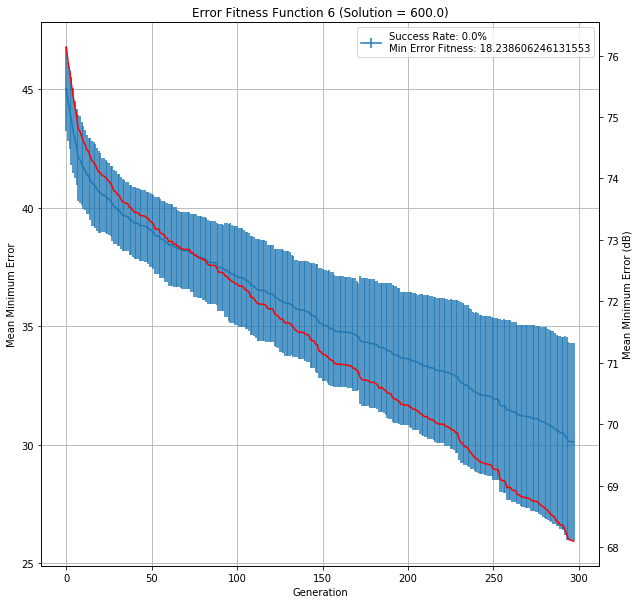

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[6_30_51_300_0.3_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,6,30,0.3,27.058491,21.600884,32.145295,31.095999,30.815579,30.593477,...,22.655068,24.818823,26.259711,37.677616,29.945901,29.26523,32.301259,30.108635,8:15:49,90000
